## Assignment 1 - Beer and Mosquitos

This assignment is based on the video discussed in module 1.

John Rauser ( 2014). Statistics Without the Agonizing Pain. Strata Hadoop 2014. Retrieved from https://www.youtube.com/watch?v=5Dnw46eC-0o

(Source: https://www.youtube.com/watch?v=5Dnw46eC-0o )

## Learning outcomes
- Use code to work with data
- Calculate basic statistical measures 
- Implement a data simulation by using resampling 

This assignment will analyze data from a study by Lefèvre T, Gouagna L-C, Dabiré KR, Elguero E, Fontenille D, Renaud F, et al. (2010) Beer Consumption Increases Human Attractiveness to Malaria Mosquitoes. PLoS ONE 5(3): e9546. https://doi.org/10.1371/journal.pone.0009546.  The purpose of the study was to "ascertain the effect of beer consumption on human attractiveness to malaria mosquitoes in semi field conditions in Burkina Faso."  The null hypothesis may be stated as:

<center><i>"There is no relationship between human attractiveness to malaria mosquitoes whether they are 'treated' with beer or water."</i></center>

We will endeavor to disprove this null hypothesis.



__Question 1__

1.  Using the dataset from the video (mosquitos_data.csv in the course folder), write Python code:  

 - Create side-by-side boxplots for the number of mosquitos in each group (_beer vs water_)
 -  What does the graph reveal about the data for both groups? Is there an association between beer consumption and attractivness to mosquitos?
 - Calculate basic statistics measures for each group: the mean, median, standard deviation and explain the numbers.
 
2. Write code to implement the data simulation demonstrated in the above mentioned video. Calculate the probability of obtaining the experiment outcome assuming no association between beer consumption.

## Hints

- Use pandas, matplotlib, or seaborn to plot boxplots in Python.
- Label the graphs wherever applicable e.g. title, legend, units etc. 

This assignment demonstrates one of the main ideas of statistical inference. To find if the experimentally observed difference (approx. 4.4) between the two subsets is statistically significant, we need to calculate the probability of obtaining the experiment’s outcome by chance, or by assuming that there is no association between the results from beer or water consumption.  
Under this assumption, we can randomly shuffle the data so that after enough iterations we may obtain the distribution of the mean differences. This distribution shows the odds of obtaining the difference by chance. From this histogram, the area under calculated distribution to the left from 4.4 is the probability of obtaining a mean difference less than 4.4 under skeptical approach (no association assumption). Meanwhile, the area under the graph’s right tail corresponds to the probability of finding a difference of 4.4 or higher under the same assumption.   
If the latter probability is too small, one can conclude that it is very unlikely to get such an observation by chance and the skeptical ‘no association’ hypothesis can be rejected. Usually, this probability is compared to the preset significance level.   

In [1]:
import pandas as pd
from pandas import Series, DataFrame
pd.set_option('display.max_rows', 50)
import numpy as np
from random import randint
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

np.random.seed(123)

%matplotlib inline

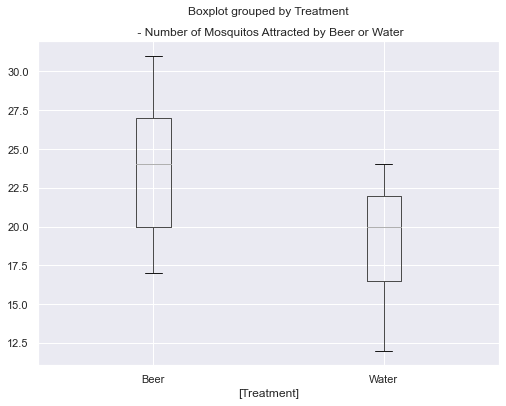

In [2]:
#Load to Pandas DF, and create boxplot.

df = pd.read_csv('mosquitos_data.csv')

df.boxplot(by='Treatment', figsize=(8,6))
plt.title(' - Number of Mosquitos Attracted by Beer or Water');

Text(0.5, 1.0, 'Boxplot of Mosquitoes Attracted')

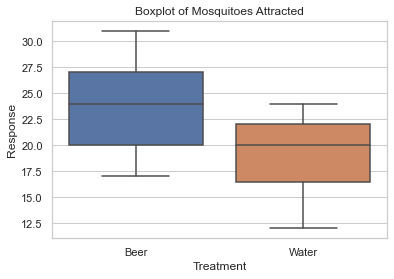

In [3]:
#Seaborn boxplot

sns.set_style("whitegrid")
sns.boxplot(y=df["Response"], x=df["Treatment"])
plt.title('Boxplot of Mosquitoes Attracted')

#### Is there an association between beer consumption and attractivness to mosquitos?

__Answer:__ It looks like there is an association between beer consumption and attractiveness, as median and other values in the beer group are higher corresponding value in the water group. However, there is a high overlap and inference analysis is required. In this module, we will run a simulation.

#### Calculate basic statistics measures for each group:
the mean, median, standard deviation.

In [4]:
dfg = df.groupby('Treatment')

print('The mean of each group:\n', dfg.mean())
print('\n\nThe median of each group:\n', dfg.median())
print('\n\nThe standard deviation of each group:\n', dfg.std())
real_difference = dfg.mean().iloc[0] - dfg.mean().iloc[1]

The mean of each group:
             Response
Treatment           
Beer       23.600000
Water      19.222222


The median of each group:
            Response
Treatment          
Beer           24.0
Water          20.0


The standard deviation of each group:
            Response
Treatment          
Beer       4.133199
Water      3.671120


In [5]:
df.groupby('Treatment').describe()

Response                                                   
             count       mean       std   min   25%   50%   75%   max
Treatment                                                            
Beer          25.0  23.600000  4.133199  17.0  20.0  24.0  27.0  31.0
Water         18.0  19.222222  3.671120  12.0  16.5  20.0  22.0  24.0

#### Explain the numbers.
__A:__ The mean shows average number of mosquitos attracted by each member of the group.  In this case, everyone who drank beer attracted 23.6 mosquitos on average, while everyone who drank water attracted 19.2 on average.

Median shows 50% quantile, which means that after sorting the number of mosquitos attracted by each member in the group, how many mosquitos were attracted by the person in the middle (if odd number of people in the group) or the average of the mosquitos attracted by the two people in the middle (even number of group members).  In this case, the person in middle attracted 24 mosquitos in beer group (25 members), and the two persons in the middle of water group attracted 20 mosquitos each, on average.

Standard deviation shows the variability, describing how far away the typical observation is from the mean. In this case, each member in beer group typically attracted 4.1 mosquitos more or less than 23.6 (mean); while each water group member typically attracted 3.7 mosquitos more or less than 19.2.

#### 2) Write the code to implement the data simulation demonstrated in the video (this maybe a bit challenging for some, hints will be given in class)

a. 'Manual' data swap:

In [6]:
def swap(data, sample_size = 9):
    set1 = data[data['Treatment'] == 'Beer'] #get beer subject group
    set2 = data[data['Treatment'] == 'Water'] #get water subject group
    #sample_size = 9 #randint(1,18) #get sample size to swap <= 18 water subjects
    set1_elements = set1.sample(n=sample_size) #get swap subset from beer group
    set1_rest = set1.loc[~set1.index.isin(set1_elements.index)]  #get remainder from beer group
    set2_elements = set2.sample(n=sample_size) #get swap subset from water group
    set2_rest = set2.loc[~set2.index.isin(set2_elements.index)] #get remainder from water group
    set1_elements['Treatment'] = 'Water' #change beer swap subset label to 'water'
    set2_elements['Treatment'] = 'Beer' #change water swap subset label to 'beer'
    set1 = pd.concat([set2_elements,set1_rest]) #concat changed water subset to beer remainder
    set2 = pd.concat([set1_elements,set2_rest]) #concat changed beer subset to water remainder
    set1_mean = set1['Response'].mean() #get post-swap beer group mean
    set2_mean = set2['Response'].mean() #get post-swap water group mean
    diff = set1_mean - set2_mean #get mean difference
    return diff

In [7]:
iterations=10000

#Swap fixed number of points, second argument sets number of observations to swap: 

df3 = pd.DataFrame([[i,swap(df, 8)] for i in range(iterations)], columns=['x','y']) 

#Or random number of points, randint(1,18) is passed as second argument:

#df3 = pd.DataFrame([[i,swap(df, randint(1, 18))] for i in range(iterations)], columns=['x','y']) 

Text(0, 0.5, 'Probability')

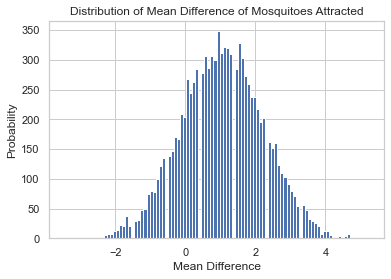

In [8]:
# Set style of scatterplot
#sns.set_context("notebook", font_scale=1.1)
#sns.set_style("ticks")

# Create scatterplot of dataframe
#plot = sns.kdeplot(df3.y)
plt.hist(df3.y,bins=100)
# Set title
plt.title('Distribution of Mean Difference of Mosquitoes Attracted')

# Set x-axis label
plt.xlabel('Mean Difference')

# Set y-axis label
plt.ylabel('Probability')

__Note:__ In this case, when 8 observations were swapped in each iteration, the distribution is not centered at 0.0, the center is somewhat shifted to the right. This is because one of the arrays has a larger mean.
* If less than 9 observations are swapped, each iteration in the resulting distribution is shifted to the right,
* if swapping more than 9 observations, too many points from water subset are moved to beer subset and the difference of means distribution will be centered at some negative value.

In case a random number of observations are swapped each time, table-top distribution is expected, since the result will be an aggregate of both right- and left-shifted.

b. Using `np.random.parmutation()` method:

In [9]:
#Calculate the delta of the mean between two groups in concern.

dfm = dfg.mean()
mdt = dfm.iloc[0]-dfm.iloc[1]

In [10]:
# Another way to shuffle the data is to use permutation 
# to permute indices and then split the the dataframe.

ls = []
for i in range(50000): 
    arr = np.random.permutation(43)
    delta = df.iloc[arr[:25]].Response.mean() - df.iloc[arr[-18:]].Response.mean()
    ls.append(delta)

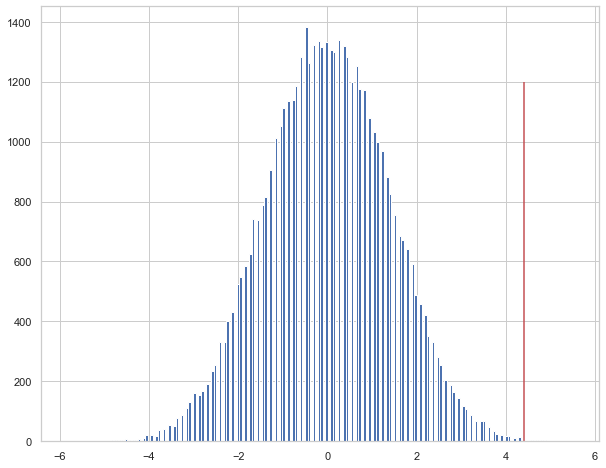

In [11]:
#Plot the list in histogram, with a red verticle line indicate the real mean-delta produced from
# real testing.

ser = pd.Series(ls)
ser.hist(bins=200,figsize=(10,8))
plt.vlines(4.4,ymin=0,ymax=1200,colors='r' );

The simulation shows that the difference of means from the experiment is on the very rare side of the normal distribution shape plotted by the random permutation. This supports the assumption about  correlation between beer consumption and mosquito attraction.

c. Below is another way to shuffle data. This time the `numpy.random.shuffle()` method is used. Dataset is first splitted and converted to list, combined list is shuffled 'number_simulations' times and after each time, shuffle combined array is split into two to calculate means and their difference. Function `ShuffleData` returns tuple of list of  differences and p-value. 

In [12]:
list_Beer = df[df['Treatment']=='Beer']['Response'].tolist()
list_water = df[df['Treatment'] == 'Water']['Response'].tolist()

In [13]:
import scipy.stats as stats


def ShuffleData(list1, list2, number_simulations = 10000):
    # n is set to length of list1 (intention to pass list_Beer in function call later)
    # means is and array to collect iteration results:
    n,  means = len(list1), [] 
    diff = np.mean(list1) - np.mean(list2)
    
    # To monitor the performance we add rolling average which shows how the average mean changes as we add more simulations
    partial_mean = []
    
    k = 0

    for j in range(number_simulations):
        # conbined array is created each iteration, this way each iteration original array is shuffled
        combined = np.concatenate([list1, list2])
    
        np.random.shuffle(combined)
        mean = np.mean(combined[:n]) - np.mean(combined[n:])
        k += diff < mean
        
        means += [mean]
        
        partial_mean.append(np.array(means).mean())
        
    return means, k, partial_mean

In [14]:
means = ShuffleData(list_Beer, list_water, 50000)

<AxesSubplot:>

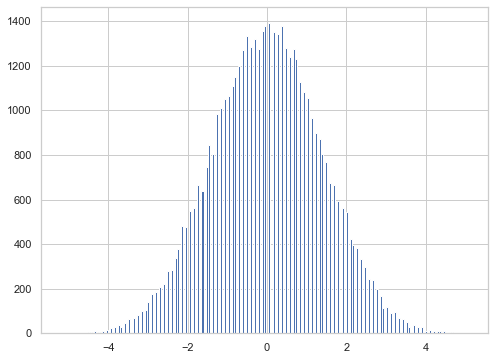

In [15]:
shuffled = pd.Series(means[0])
shuffled.hist(bins=200, figsize=(8,6))
# plt.vlines(real_difference,ymin=0,ymax=1,colors='r')

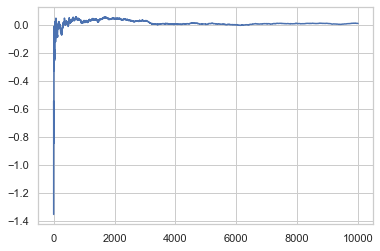

In [16]:
# Running mean value of similations:
plt.plot(range(0, 10000,1), means[2][:10000], lw=1.5)

This plot shows that after approx. 3000 simulation the average mean does not fluctuate much. Continuing to 10,000 simulations does not damp fluctuation much. Nevertheless, we usually continue simulations in order to make sure simulations are stable.

In [17]:
print('The probability of obtaining the expariment outcome is ', means[1]/50000)

# Note, we used 50,000 simulations here but monitoring shows that we should have stopped at 10,000

The probability of obtaining the expariment outcome is  0.0005


In iteration loop we counted number of times simulated experiment produce the mean 4.4 or larger.   
Python function returns tuples, in particular function 'ShuffleData' will return tuple with two items
* list of means from simulations
* count of outcome with mean > 4.4

Probability of observing the experiment outcome is (number of outcomes with mean > 4.4) / (number of iterations).